In [2]:
# Familiar imports
import numpy as np
import pandas as pd

# For ordinal encoding categorical variables, splitting data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

# For training random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_regression
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, roc_auc_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
import datetime
import os

In [6]:
# Load the training data
#rawtrain = pd.read_csv("../input/tabular-playground-series-nov-2021/train.csv", index_col=0)
#rawtest = pd.read_csv("../input/tabular-playground-series-nov-2021/test.csv", index_col=0)
oldtrain = pd.read_csv("../input/tabular-playground-series-nov-2021/train.csv", index_col=0)
rawtrain = pd.read_pickle("./models/train.dae.pd")
rawtest = pd.read_pickle("./models/test.dae.pd")

In [7]:
rawtrain["target"]=oldtrain["target"]

In [8]:
train = rawtrain.copy()
y = train['target']
features = train.drop(['target'], axis=1)

In [9]:
X = features.copy()
X.shape

(600000, 100)

In [10]:
test = rawtest.copy()
test.shape

(540000, 100)

In [11]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks, regularizers
from keras import backend as K
import tensorflow as tf

In [12]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10548454581406702135
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9898950656
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2062806369421238334
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:2a:00.0, compute capability: 8.6"
]


In [13]:
input_shape = [X.shape[1]]

def create_model():
    model = keras.Sequential([
        layers.BatchNormalization(input_shape = input_shape),
        layers.GaussianNoise(stddev=0.2),
        layers.Dense(units = 1024, activation = 'relu', activity_regularizer=regularizers.l1(10e-5)),
        layers.BatchNormalization(),
        layers.Dropout(rate = 0.3),
        layers.Dense(units = 128, activation = 'relu'),
        layers.BatchNormalization(),
        layers.Dropout(rate = 0.3),
        layers.Dense(units = 1024, activation = 'relu'),
        layers.BatchNormalization(),
        layers.Dropout(rate = 0.3), 
        layers.Dense(units = 1, activation = 'hard_sigmoid')
    ])
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC()]
    ) 
    return model

In [14]:
X.shape[0]*0.01

6000.0

In [15]:
print(os.getcwd())

C:\Users\Vladimir\workspace\kaggle\tabular-playground-series-nov


In [16]:
from numba import cuda

0it [00:00, ?it/s]

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:2a:00.0, compute capability: 8.6

Epoch 1/600
90/90 [==============================] - 10s 37ms/step - loss: 1.1071 - auc: 0.5038 - val_loss: 0.7154 - val_auc: 0.5084
Epoch 2/600
90/90 [==============================] - 3s 34ms/step - loss: 1.1944 - auc: 0.5024 - val_loss: 0.8091 - val_auc: 0.5009
Epoch 3/600
90/90 [==============================] - 3s 30ms/step - loss: 1.4749 - auc: 0.5035 - val_loss: 0.8728 - val_auc: 0.4872
Epoch 4/600
90/90 [==============================] - 1s 8ms/step - loss: 1.1863 - auc: 0.5046 - val_loss: 0.9453 - val_auc: 0.5000
Epoch 5/600
90/90 [==============================] - 1s 8ms/step - loss: 1.0218 - auc: 0.5074 - val_loss: 0.7565 - val_auc: 0.5132
Epoch 6/600
90/90 [==============================] - 1s 8ms/step - loss: 1.0945 - auc: 0.5030 - val_loss: 0.8575 - val_auc: 0.5083
Epoch 7/600
90/90 [==============================]

1it [01:49, 109.70s/it]

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:2a:00.0, compute capability: 8.6

Epoch 1/600
90/90 [==============================] - 2s 12ms/step - loss: 1.0970 - auc: 0.5040 - val_loss: 0.7144 - val_auc: 0.4923
Epoch 2/600
90/90 [==============================] - 1s 8ms/step - loss: 1.2275 - auc: 0.5025 - val_loss: 1.1457 - val_auc: 0.5204
Epoch 3/600
90/90 [==============================] - 1s 8ms/step - loss: 1.3940 - auc: 0.4980 - val_loss: 0.8843 - val_auc: 0.5073
Epoch 4/600
90/90 [==============================] - 1s 8ms/step - loss: 1.1768 - auc: 0.5014 - val_loss: 0.9055 - val_auc: 0.5166
Epoch 5/600
90/90 [==============================] - 1s 8ms/step - loss: 1.1413 - auc: 0.5062 - val_loss: 1.1424 - val_auc: 0.5233
Epoch 6/600
90/90 [==============================] - 1s 8ms/step - loss: 1.0844 - auc: 0.5062 - val_loss: 0.8043 - val_auc: 0.5156
Epoch 7/600
90/90 [==============================] - 

2it [03:22, 99.69s/it] 

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:2a:00.0, compute capability: 8.6

Epoch 1/600
90/90 [==============================] - 2s 12ms/step - loss: 1.1763 - auc: 0.5034 - val_loss: 0.7149 - val_auc: 0.5175
Epoch 2/600
90/90 [==============================] - 1s 8ms/step - loss: 1.1236 - auc: 0.5040 - val_loss: 0.7155 - val_auc: 0.5227
Epoch 3/600
90/90 [==============================] - 1s 8ms/step - loss: 0.9785 - auc: 0.5072 - val_loss: 0.8106 - val_auc: 0.5144
Epoch 4/600
90/90 [==============================] - 1s 8ms/step - loss: 1.1254 - auc: 0.5074 - val_loss: 0.9162 - val_auc: 0.4971
Epoch 5/600
90/90 [==============================] - 1s 8ms/step - loss: 1.1181 - auc: 0.5076 - val_loss: 0.7672 - val_auc: 0.5107
Epoch 6/600
90/90 [==============================] - 1s 8ms/step - loss: 1.0858 - auc: 0.5008 - val_loss: 0.8473 - val_auc: 0.5251
Epoch 7/600
90/90 [==============================] - 

2it [03:57, 118.88s/it]


KeyboardInterrupt: 

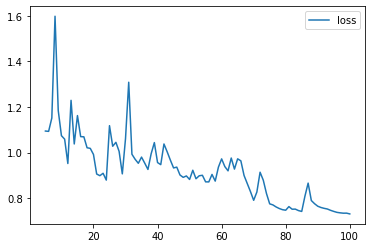

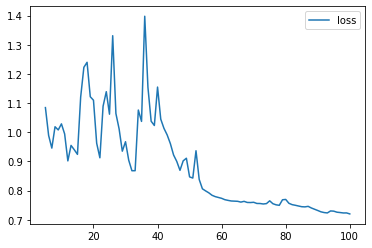

In [17]:
spl = 10
kf = StratifiedKFold(n_splits=spl, shuffle=True)
test_pred_total = np.zeros((len(test),1))
mse = []

y_preds = []
yvs = []

train_idxs = []
valid_idxs = []

stopping_rounds = 400
for train_idx, valid_idx in tqdm(kf.split(X,y.round(-1))):
        train_idxs.append(train_idx)
        valid_idxs.append(valid_idx)
        Xt = X.iloc[train_idx, :]
        yt = y.iloc[train_idx]
        Xv = X.iloc[valid_idx, :]
        yv = y.iloc[valid_idx]
        sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
        model=create_model()
        yvs.append(yv)
        early_stopping = callbacks.EarlyStopping(
            min_delta=0.0001, # minimium amount of change to count as an improvement
            patience=100, # how many epochs to wait before stopping
            restore_best_weights=True,
        )
        
        log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
        history = model.fit(Xt, yt, validation_data=(Xv, yv), 
                            callbacks = [early_stopping, tensorboard_callback], 
                            batch_size=6000, epochs=600)
        history_df = pd.DataFrame(history.history)
        # Start the plot at epoch 5. You can change this to get a different view.
        history_df.loc[5:, ['loss']].plot();
        y_pred = model.predict(Xv)
        y_preds.append(y_pred)
        valid_mse =  roc_auc_score(yv, y_pred)
        mse.append(valid_mse)
        print("valid mse", valid_mse)
        test_pred = model.predict(test) / spl
        test_pred_total += test_pred
        K.clear_session()
        del model
test_pred_total = test_pred_total.reshape((len(test),))
print("all valid mse", mse, " min ", min(mse), " max ", max(mse), " avg ", sum(mse)/len(mse))

In [ ]:
# Save the predictions to a CSV file
output = pd.DataFrame({'Id': rawtest.index,
                       'target': test_pred_total})
output.to_csv('submission.csv', index=False)

In [ ]:
from datetime import datetime
print(datetime.now())